In [1]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pickle
import sklearn
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

# Binned Data

In [2]:
oresults_path = '../predicted-results/original/nbins-10'
mresults_path = '../predicted-results/mixed5050/nbins-10'
eresults_path = '../predicted-results/everything/nbins-10'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050/nbins-10'
emodels_path = '../models/everything/nbins-10'

test_sets = ['5050', '2575', 'everything']

mpoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 'all']
epoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 'all']



In [3]:
results = {'5050': {'COF': dict(),
                    'intercept': dict()},
           '2575': {'COF': dict(),
                    'intercept': dict()},
           'everything': {'COF': dict(),
                          'intercept': dict()}}
# First deal with the original models 
for tset in results:
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        results[tset][target]['original'] = {
#             'model': model,
#             'features': features,
#             'data': data,
              'n_train': len(model.oob_prediction_),
              'r_square': data[target]['r_square']
        }

# Then deal with the 5050 mixed models 
for tset in results:
    for i in range(5):
        for point in mpoints:
            for target in ['COF', 'intercept']:
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{mresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                if i == 0:
                    results[tset][target][f'5050_{point}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']]}
                else:
                    results[tset][target][f'5050_{point}']['r_square'].append(data[target]['r_square'])
# Lastly deal with the everything models
for tset in results:
    for i in range(5):
        for point in epoints:
            for target in ['COF', 'intercept']:
                with open(f'{emodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{emodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{eresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                if i == 0:
                    results[tset][target][f'everything_{point}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']]}
                else:
                    results[tset][target][f'everything_{point}']['r_square'].append(data[target]['r_square'])


In [4]:
for tset in results:
    for target in ['COF', 'intercept']:
        for point in mpoints:
            # doi: dict of interest
            doi = results[tset][target][f'5050_{point}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])

        for point in epoints:
            doi = results[tset][target][f'everything_{point}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])
            

## Combination R<sup>2</sup> Plots

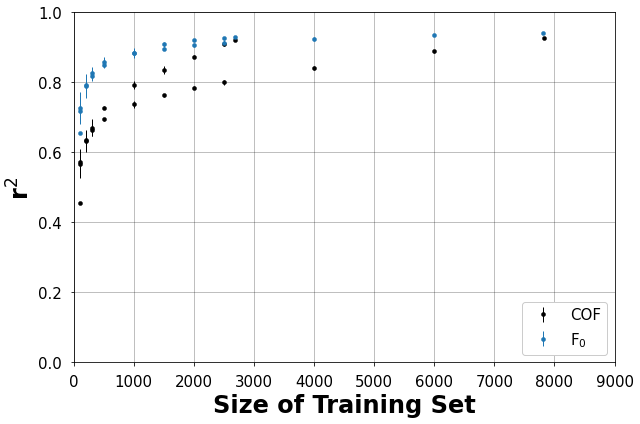

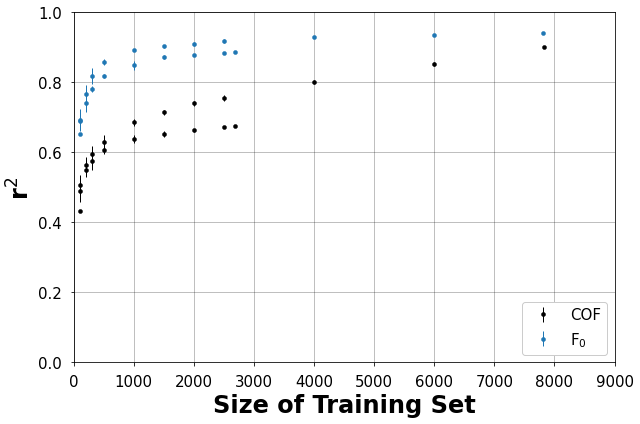

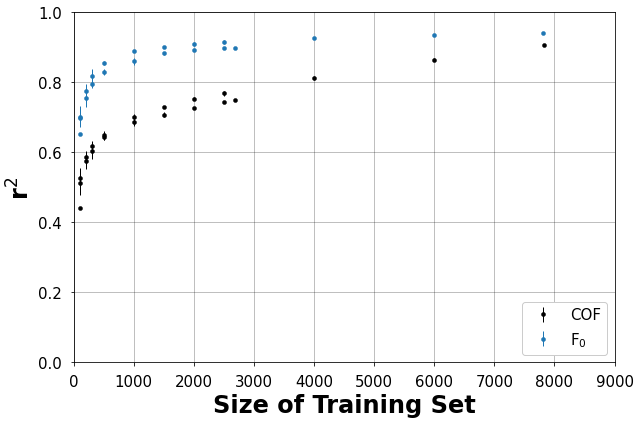

In [5]:
for tset in test_sets:
    to_plot = {'COF': {'n_train': list(),
                       'r_square_avg': list(),
                       'r_square_std': list()},
               'intercept': {'n_train': list(),
                             'r_square_avg': list(),
                             'r_square_std': list()}}
    for target in ['COF', 'intercept']:
        for model, data in results[tset][target].items():
            #print(data)
            try:
                to_plot[target]['r_square_avg'].append(data['r_square_avg'])
                to_plot[target]['r_square_std'].append(data['r_square_std'])
                to_plot[target]['n_train'].append(data['n_train'])

            except KeyError:
                to_plot[target]['n_train'].append(data['n_train'])
                to_plot[target]['r_square_avg'].append(data['r_square'])
                to_plot[target]['r_square_std'].append(0)
                
    #print(to_plot)
    #plt.title('Effect of Training Set Size', fontsize=20, fontweight='bold')
    plt.figure(figsize=[9, 6])
    plt.xlabel('Size of Training Set')
    plt.ylabel('r$^2$', fontweight='bold')
    plt.xlim(0, 9000)
    plt.ylim(0, 1)
    plt.errorbar(x=to_plot['COF']['n_train'],
                 y=to_plot['COF']['r_square_avg'],
                 yerr=to_plot['COF']['r_square_std'],
                 color='black',
                 fmt='.',
                 elinewidth=1)
    plt.errorbar(x=to_plot['intercept']['n_train'],
                 y=to_plot['intercept']['r_square_avg'],
                 yerr=to_plot['intercept']['r_square_std'],
                 fmt='.',
                 elinewidth=1)
    plt.legend(['COF', 'F$_0$'], loc=4)

## Refined R<sup>2</sup> plot
### Mixed 5050 models on 5050 test set

In [6]:
markersize=6
COF_color = 'dodgerblue'
F0_color = 'firebrick'

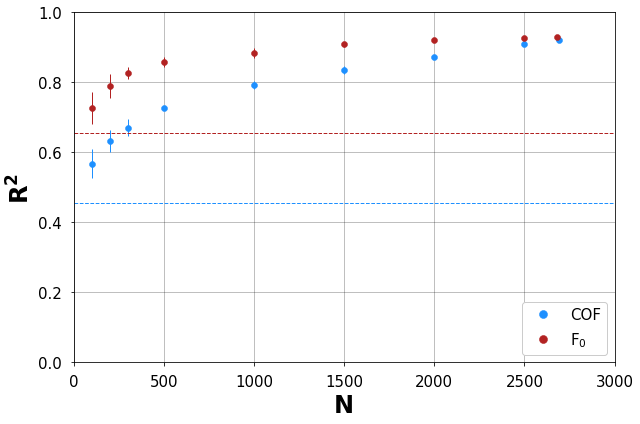

In [7]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if '5050' in model:
            to_plot_on_5050[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_5050[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_5050[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_5050[target]['base'] = data['r_square']
                
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0, 1)
# plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
#             y=to_plot_on_5050['COF']['r_square_avg'],
#             yerr=to_plot_on_5050['COF']['r_square_std'],
#             color='black',
#             fmt='.',
#             elinewidth=1)
plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square_avg'],
            yerr=to_plot_on_5050['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

# plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
#             y=to_plot_on_5050['intercept']['r_square_avg'],
#             yerr=to_plot_on_5050['intercept']['r_square_std'],
#             fmt='.',
#             elinewidth=1)
plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square_avg'],
            yerr=to_plot_on_5050['intercept']['r_square_std'],
            color=F0_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)

# legend_elements = [Line2D([0], [0], marker='o', color='black', linestyle='', label='COF'),
#                    Line2D([0], [0], marker='o', color='steelblue', linestyle='', label='F$_0$')]
legend_elements = [Line2D([0], [0], marker='o', color='dodgerblue', linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color='firebrick', linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
plt.savefig(fname='./plots/r2vsN/5050_on_5050.pdf', dpi=500)

# print('COF')
# print(f'n: {to_plot_on_5050["COF"]["n_train"]}')
# print(f'r2: {to_plot_on_5050["COF"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_5050["COF"]["r_square_std"]}')

# print('F0')
# print(f'n: {to_plot_on_5050["intercept"]["n_train"]}')
# print(f'r2: {to_plot_on_5050["intercept"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_5050["intercept"]["r_square_std"]}')
     

# Refined R<sup>2</sup> plot 
### Everything models on 5050 test set

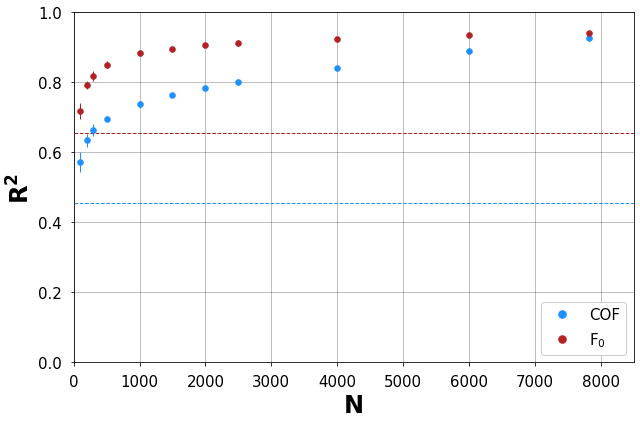

In [8]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if 'everything' in model:
            to_plot_on_5050[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_5050[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_5050[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_5050[target]['base'] = data['r_square']
                
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 8500)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square_avg'],
            yerr=to_plot_on_5050['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square_avg'],
            yerr=to_plot_on_5050['intercept']['r_square_std'],
            color=F0_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color=F0_color, linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
plt.savefig(fname='./plots/r2vsN/everything_on_5050.pdf', dpi=500)

# print('COF')
# print(f'n: {to_plot_on_5050["COF"]["n_train"]}')
# print(f'r2: {to_plot_on_5050["COF"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_5050["COF"]["r_square_std"]}')

# print('F0')
# print(f'n: {to_plot_on_5050["intercept"]["n_train"]}')
# print(f'r2: {to_plot_on_5050["intercept"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_5050["intercept"]["r_square_std"]}')
      

# Refined R<sup>2</sup> plot 
### Mixed 5050 models on 2575 test set

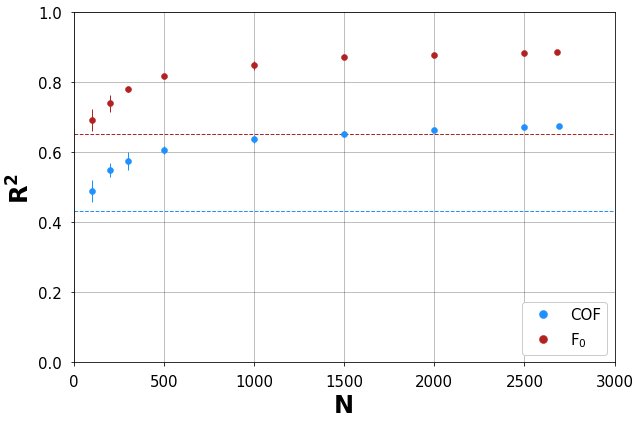

In [9]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if '5050' in model:
            to_plot_on_2575[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_2575[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_2575[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_2575[target]['base'] = data['r_square']
                
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square_avg'],
            yerr=to_plot_on_2575['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square_avg'],
            yerr=to_plot_on_2575['intercept']['r_square_std'],
            color=F0_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)


legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color=F0_color, linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
plt.savefig(fname='./plots/r2vsN/5050_on_2575.pdf', dpi=500)

# print('COF')
# print(f'n: {to_plot_on_2575["COF"]["n_train"]}')
# print(f'r2: {to_plot_on_2575["COF"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_2575["COF"]["r_square_std"]}')

# print('F0')
# print(f'n: {to_plot_on_2575["intercept"]["n_train"]}')
# print(f'r2: {to_plot_on_2575["intercept"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_2575["intercept"]["r_square_std"]}')
      

# Refined R<sup>2</sup> plot 
### Everything models on 2575 test set

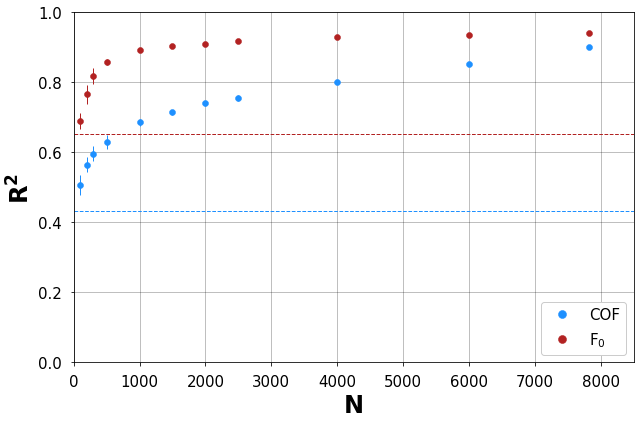

In [10]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if 'everything' in model:
            to_plot_on_2575[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_2575[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_2575[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_2575[target]['base'] = data['r_square']
                
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 8500)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square_avg'],
            yerr=to_plot_on_2575['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square_avg'],
            yerr=to_plot_on_2575['intercept']['r_square_std'],
            color=F0_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color=F0_color, linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
plt.savefig(fname='./plots/r2vsN/everything_on_2575.pdf', dpi=500)

# print('COF')
# print(f'n: {to_plot_on_2575["COF"]["n_train"]}')
# print(f'r2: {to_plot_on_2575["COF"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_2575["COF"]["r_square_std"]}')

# print('F0')
# print(f'n: {to_plot_on_2575["intercept"]["n_train"]}')
# print(f'r2: {to_plot_on_2575["intercept"]["r_square_avg"]}')
# print(f'yerr: {to_plot_on_2575["intercept"]["r_square_std"]}')
      

# Refined R<sup>2</sup> plot 
### Everything model on everything test set

COF
n: [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7818]
r2: [0.5276806801182345, 0.5866629156485567, 0.6168633976011992, 0.6493563751777675, 0.7018077864276737, 0.7293644719307434, 0.7537695185013453, 0.7682508950463147, 0.8134700144368937, 0.864158857587167, 0.9077719021972234]
yerr: [0.02728729757931737, 0.017948833752303404, 0.017027533741293812, 0.013058528566227376, 0.006872547576116439, 0.0034653817109022273, 0.005403000474681764, 0.006104767364458908, 0.005367295719973442, 0.004216390694062118, 0.0003671732293323656]
F0
n: [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7817]
r2: [0.6979798091555354, 0.7741751504956322, 0.8188039576273498, 0.8556090442594908, 0.8894423483817192, 0.9006200423663409, 0.9091882427383908, 0.9163058536005353, 0.9272614922235771, 0.9364758885054748, 0.9400804867615531]
yerr: [0.02000772117121382, 0.02069863792949222, 0.019334655436674716, 0.006576534004168684, 0.0034753172325826904, 0.0036684547895567804, 0.005316777701797591, 0

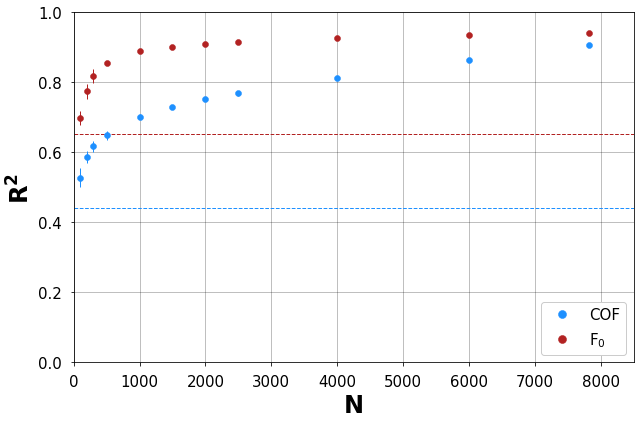

In [11]:
to_plot_on_everything = {'COF': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['everything'][target].items():
        if ('everything' in model):
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
            to_plot_on_everything[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_everything[target]['r_square_std'].append(data['r_square_std'])
        elif 'original' in model: 
            to_plot_on_everything[target]['base'] = data['r_square']
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0,8500)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square_avg'],
            yerr=to_plot_on_everything['COF']['r_square_std'],
            fmt='o',
            markersize=markersize,
            color=COF_color,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square_avg'],
            yerr=to_plot_on_everything['intercept']['r_square_std'],
            fmt='o',
            markersize=markersize,
            color=F0_color,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color=F0_color, linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
#plt.savefig(fname='./plots/r2vsN/everything_on_everything.pdf', dpi=500)

print('COF')
print(f'n: {to_plot_on_everything["COF"]["n_train"]}')
print(f'r2: {to_plot_on_everything["COF"]["r_square_avg"]}')
print(f'yerr: {to_plot_on_everything["COF"]["r_square_std"]}')

print('F0')
print(f'n: {to_plot_on_everything["intercept"]["n_train"]}')
print(f'r2: {to_plot_on_everything["intercept"]["r_square_avg"]}')
print(f'yerr: {to_plot_on_everything["intercept"]["r_square_std"]}')
      

# Refined R<sup>2</sup> plot 
### 5050 model on everything test set

COF
n: [100, 200, 300, 500, 1000, 1500, 2000, 2500, 2690]
r2: [0.5128031190263928, 0.5753574494279332, 0.604774058015583, 0.6433719665456049, 0.6862602479574818, 0.7079612598957405, 0.7266939103163157, 0.7441090092864195, 0.7506119018752779]
yerr: [0.03385357231586148, 0.022037482947406758, 0.02497669162548722, 0.0078015624704450585, 0.010301293247320417, 0.007464828103903235, 0.0027335098052814148, 0.002304823688391194, 0.000513705522053538]
F0
n: [100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
r2: [0.7019128658044984, 0.755030247407076, 0.7942284685130694, 0.8294314639257492, 0.8597114294948582, 0.8833316643589668, 0.8922509237870642, 0.8981321983183159, 0.8996690177972152]
yerr: [0.030755474386372956, 0.025106460905094143, 0.009327867541831342, 0.00805771932431652, 0.009833915232848359, 0.004110656621276038, 0.0012734588462434812, 0.0008396707927871015, 0.0002610946738422326]


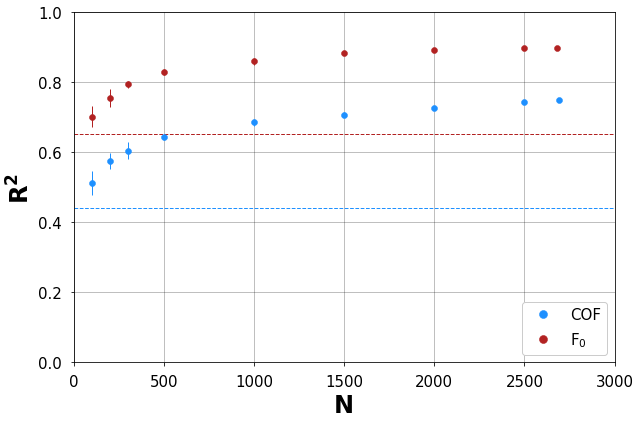

In [12]:
to_plot_on_everything = {'COF': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'base': None}}
for target in ['COF', 'intercept']:
    for model, data in results['everything'][target].items():
        if ('5050' in model):
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
            to_plot_on_everything[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_everything[target]['r_square_std'].append(data['r_square_std'])
        elif 'original' in model: 
            to_plot_on_everything[target]['base'] = data['r_square']
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square_avg'],
            yerr=to_plot_on_everything['COF']['r_square_std'],
            fmt='o',
            markersize=markersize,
            color=COF_color,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square_avg'],
            yerr=to_plot_on_everything['intercept']['r_square_std'],
            fmt='o',
            markersize=markersize,
            color=F0_color,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='o', color=F0_color, linestyle='', label='F$_0$')]
plt.legend(handles=legend_elements, loc=4)
#plt.savefig(fname='./plots/r2vsN/5050_on_everything.pdf', dpi=500)
print('COF')
print(f'n: {to_plot_on_everything["COF"]["n_train"]}')
print(f'r2: {to_plot_on_everything["COF"]["r_square_avg"]}')
print(f'yerr: {to_plot_on_everything["COF"]["r_square_std"]}')

print('F0')
print(f'n: {to_plot_on_everything["intercept"]["n_train"]}')
print(f'r2: {to_plot_on_everything["intercept"]["r_square_avg"]}')
print(f'yerr: {to_plot_on_everything["intercept"]["r_square_std"]}')
      

# Summary Table

In [13]:
import pandas as pd

In [14]:
for target in ['COF', 'intercept']:
    for model in results['5050'][target]:
        if model=='original':
            print(model)
            print(results['5050'][target][model]['r_square'])
        else:
            print(model)
            print(results['5050'][target][model]['n_train'])
            print(results['5050'][target][model]['r_square_avg'])
            print(results['5050'][target][model]['r_square_std'])
        print()

original
0.45385252741155646

5050_100
100
0.5675514340116699
0.04124766857476836

5050_200
200
0.63320234951721
0.03161578580836285

5050_300
300
0.6704002480381452
0.02367307971934661

5050_500
500
0.7279304527518178
0.0036502211655160643

5050_1000
1000
0.7933485274740077
0.010857080158401582

5050_1500
1500
0.8353384870513662
0.011211578363327925

5050_2000
2000
0.8738915726653266
0.004957992315687586

5050_2500
2500
0.9083994369686824
0.0034664842071753044

5050_all
2690
0.9220720133675615
0.0002732473069090228

everything_100
100
0.5725517665313602
0.02822389909187204

everything_200
200
0.6349473168581956
0.01861910666904457

everything_300
300
0.6633443027424402
0.016637272002153907

everything_500
500
0.6940390528939461
0.004525674817290352

everything_1000
1000
0.7377783883457275
0.009716510795236001

everything_1500
1500
0.7628764667975216
0.005064125256782373

everything_2000
2000
0.7851927046801012
0.0037895894237831443

everything_2500
2500
0.8002996767861772
0.0073440613

In [15]:
pd_dict = {'model_name' : list(),
           'n_trains' : list(),
           '5050_COF' : list(),
           '5050_F0' : list(),
           '2575_COF' : list(),
           '2575_F0' : list(),
           'everything_COF' : list(),
           'everything_F0' : list()}

# Handle original models 
pd_dict['model_name'].append('original')
pd_dict['n_trains'].append(100)
for tset in ['5050', '2575', 'everything']:
    pd_dict[f'{tset}_COF'].append(round(results[tset]['COF']['original']['r_square'], 3))
    pd_dict[f'{tset}_F0'].append(round(results[tset]['intercept']['original']['r_square'], 3))


# Handle 5050 models
for point in mpoints:
    model_name = f'5050_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['COF'][model_name]['r_square_std'], 3)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['r_square_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
        
# Handle 2575 models

for point in epoints:
    model_name = f'everything_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['COF'][model_name]['r_square_std'], 3)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['r_square_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)

In [16]:
df = pd.DataFrame(pd_dict)

In [17]:
df.to_csv('plots/summary_r2.csv')

In [18]:
plt.close()